In [1]:
#Importing libraries
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import pandas as pd

#for visualisation
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call

In [2]:
#Import the csv documnet
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Impost information about the document 
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#Drop whichever column is unnessesery for your data 
titanic_df.drop("Cabin", axis=1, inplace=True)
titanic_df.drop("Ticket", axis=1, inplace=True)
titanic_df.drop("SibSp", axis=1, inplace=True)
titanic_df.drop("Parch", axis=1, inplace=True)
titanic_df.drop("PassengerId", axis=1, inplace=True)
titanic_df.drop("Name", axis=1, inplace=True)

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [5]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [6]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,Survived,Pclass,Age,Fare,Embarked,Sex_female,Sex_male
0,0,3,22.0,7.2500,S,False,True
1,1,1,38.0,71.2833,C,True,False
2,1,3,26.0,7.9250,S,True,False
3,1,1,35.0,53.1000,S,True,False
4,0,3,35.0,8.0500,S,False,True


Now, we do the same to the "Embarked" column.

In [7]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,False,True,False,False,True
1,1,1,38.0,71.2833,True,False,True,False,False
2,1,3,26.0,7.9250,True,False,False,False,True
3,1,1,35.0,53.1000,True,False,False,False,True
4,0,3,35.0,8.0500,False,True,False,False,True


In [8]:
#Check the columns for the empty values 
titanic_df.isnull().sum()

Survived        0
Pclass          0
Age           177
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [9]:
#Remove any NaN values from the above identifued columns
titanic_df = titanic_df.dropna(subset=["Age"])
#Check the columns once again for any empty values 
titanic_df.isnull().sum()

Survived      0
Pclass        0
Age           0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [10]:
#Identify the X and y values 
X = titanic_df.iloc[:,[1, 2, 3, 4, 5, 6, 7, 8]].values
y = titanic_df.iloc[:,0].values
r = 7

In [11]:
#Split the identified values into test, train and development data sets 
X_train_full, X_test, y_train_full, y_test = train_test_split(X, 
                y, test_size=0.25,random_state=r)
X_train, X_dev, y_train, y_dev = train_test_split(X_train_full, 
                y_train_full, test_size=0.25,random_state=r)

In [12]:
#Train the tree model without pruning or max_depth
unristricted_depth_tree = DecisionTreeClassifier(max_depth=None,random_state=r)
unristricted_depth_tree.fit(X_train, y_train)
print("Performance without pruning:", unristricted_depth_tree.score(X_dev, y_dev))
print("At depth:", unristricted_depth_tree.tree_.max_depth)

Performance without pruning: 0.7164179104477612
At depth: 19


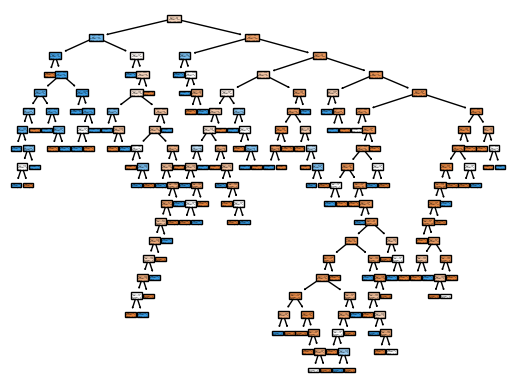

In [13]:
#Plot the unristricted tree model 
from sklearn import tree
fig = plt.figure()

#display tree
tree.plot_tree(unristricted_depth_tree,proportion = False, precision = 2, filled = True) 
fig.savefig('unristricted_tree.png')

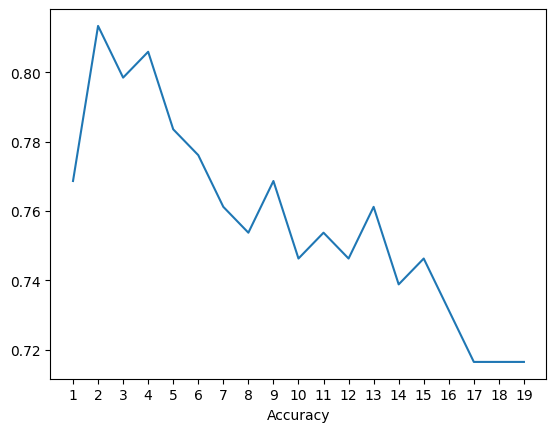

In [14]:
#Compute your model's accuracy on the develpoment set 
pruned_depths = range(1,unristricted_depth_tree.tree_.max_depth+1)
scores = [] 
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d,random_state=r)
  clf.fit(X_train, y_train)
  score = clf.score(X_dev, y_dev)
  scores.append(score)

fig, ax = plt.subplots()
ax.plot(pruned_depths, scores)
plt.xlabel("Max_depth values")
plt.xlabel("Accuracy")
ax.xaxis.set_ticks(pruned_depths)
plt.show()

### Experiment with max_depth vlaues form 2 to 10, looking at the effect on the accuracy values 

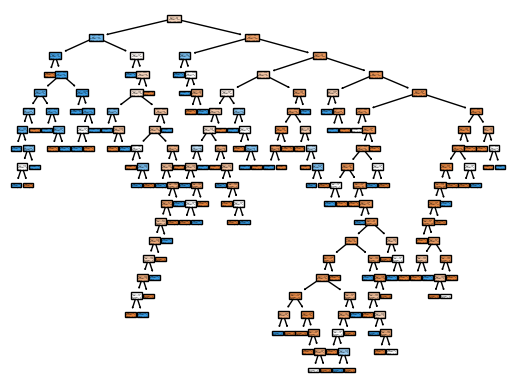

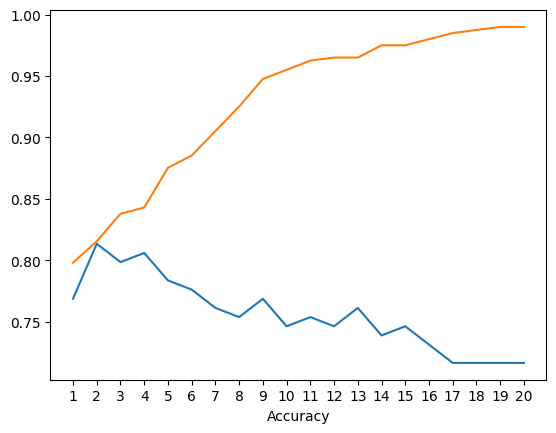

In [15]:

pruned_depths = range(1,unristricted_depth_tree.tree_.max_depth+2)
scores = [] 
train_score = []
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d,random_state=r)
  clf.fit(X_train, y_train)
  score = clf.score(X_dev, y_dev)
  score_2 = clf.score(X_train,y_train)
  train_score.append(score_2)
  scores.append(score)
  tree.plot_tree( clf,proportion = False, precision = 2, filled = True) 

fig, ax = plt.subplots()
ax.plot(pruned_depths, scores)
ax.plot(pruned_depths, train_score)
plt.xlabel("Max_depth values")
plt.xlabel("Accuracy")
ax.xaxis.set_ticks(pruned_depths)
plt.show()

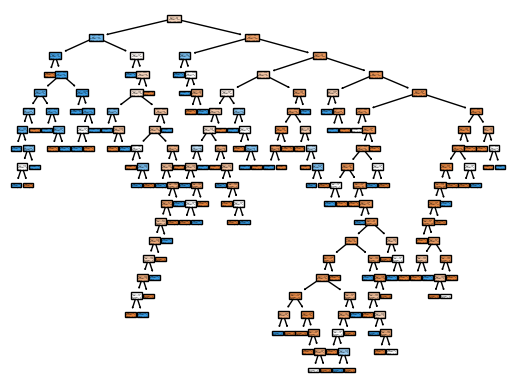

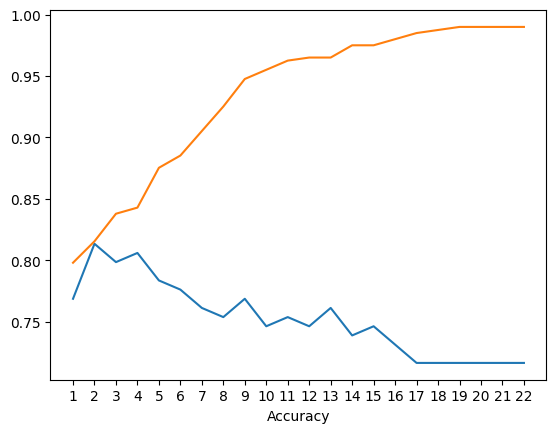

In [16]:
pruned_depths = range(1,unristricted_depth_tree.tree_.max_depth+4)
scores = [] 
train_score = []
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d,random_state=r)
  clf.fit(X_train, y_train)
  score = clf.score(X_dev, y_dev)
  score_2 = clf.score(X_train,y_train)
  train_score.append(score_2)
  scores.append(score)
  tree.plot_tree( clf,proportion = False, precision = 2, filled = True) 

fig, ax = plt.subplots()
ax.plot(pruned_depths, scores)
ax.plot(pruned_depths, train_score)
plt.xlabel("Max_depth values")
plt.xlabel("Accuracy")
ax.xaxis.set_ticks(pruned_depths)
plt.show()

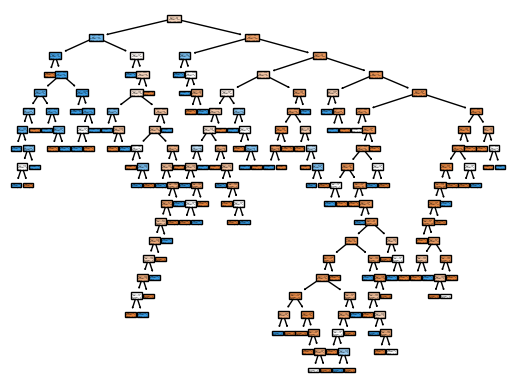

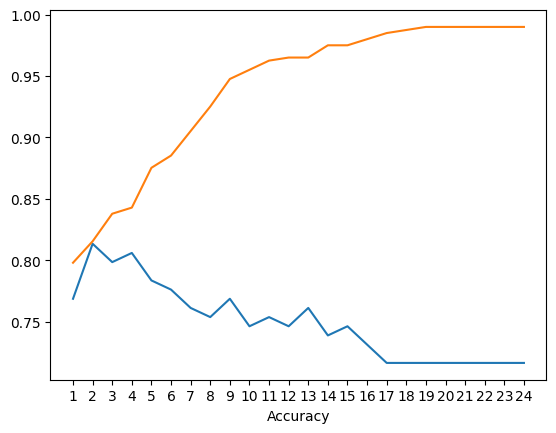

In [17]:
pruned_depths = range(1,unristricted_depth_tree.tree_.max_depth+6)
scores = [] 
train_score = []
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d,random_state=r)
  clf.fit(X_train, y_train)
  score = clf.score(X_dev, y_dev)
  score_2 = clf.score(X_train,y_train)
  train_score.append(score_2)
  scores.append(score)
  tree.plot_tree( clf,proportion = False, precision = 2, filled = True) 

fig, ax = plt.subplots()
ax.plot(pruned_depths, scores)
ax.plot(pruned_depths, train_score)
plt.xlabel("Max_depth values")
plt.xlabel("Accuracy")
ax.xaxis.set_ticks(pruned_depths)
plt.show()

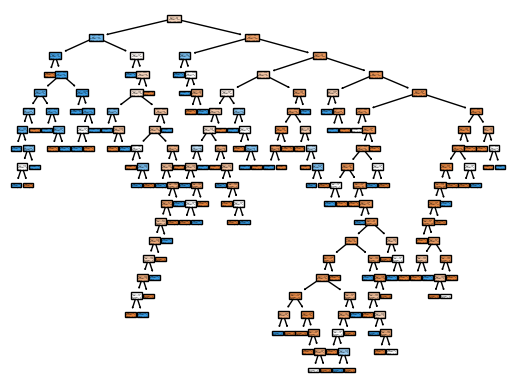

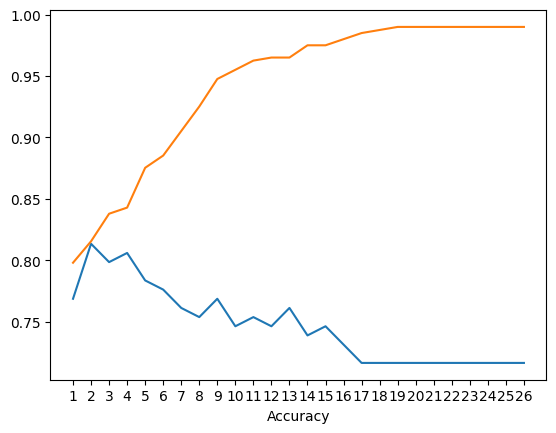

In [18]:
pruned_depths = range(1,unristricted_depth_tree.tree_.max_depth+8)
scores = [] 
train_score = []
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d,random_state=r)
  clf.fit(X_train, y_train)
  score = clf.score(X_dev, y_dev)
  score_2 = clf.score(X_train,y_train)
  train_score.append(score_2)
  scores.append(score)
  tree.plot_tree( clf,proportion = False, precision = 2, filled = True) 

fig, ax = plt.subplots()
ax.plot(pruned_depths, scores)
ax.plot(pruned_depths, train_score)
plt.xlabel("Max_depth values")
plt.xlabel("Accuracy")
ax.xaxis.set_ticks(pruned_depths)
plt.show()

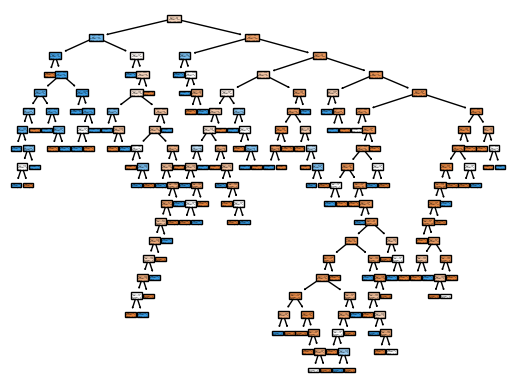

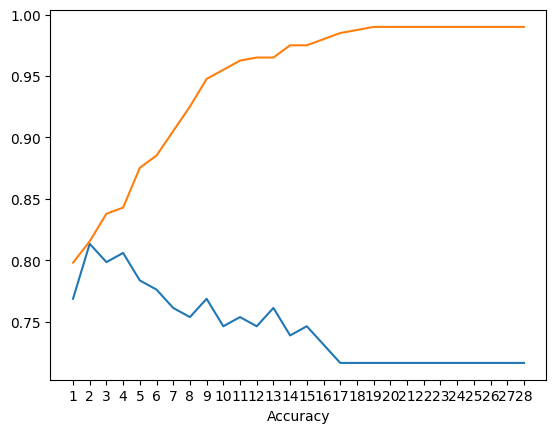

In [19]:
pruned_depths = range(1,unristricted_depth_tree.tree_.max_depth+10)
scores = [] 
train_score = []
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d,random_state=r)
  clf.fit(X_train, y_train)
  score = clf.score(X_dev, y_dev)
  score_2 = clf.score(X_train,y_train)
  train_score.append(score_2)
  scores.append(score)
  tree.plot_tree( clf,proportion = False, precision = 2, filled = True) 

fig, ax = plt.subplots()
ax.plot(pruned_depths, scores)
ax.plot(pruned_depths, train_score)
plt.xlabel("Max_depth values")
plt.xlabel("Accuracy")
ax.xaxis.set_ticks(pruned_depths)
plt.show()

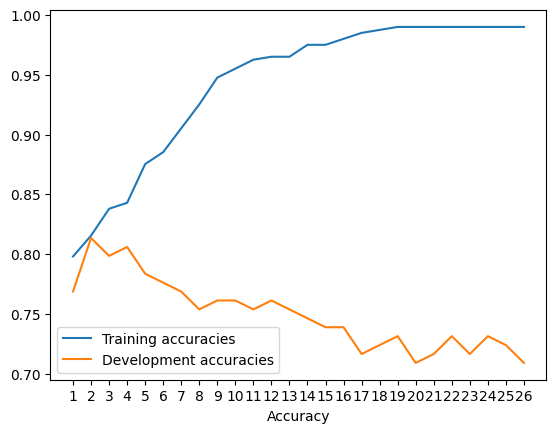

In [20]:
pruned_depths = range(1,unristricted_depth_tree.tree_.max_depth+8)
scores = [] 
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d,random_state=r)
  clf.fit(X_train, y_train)
  score = clf.score(X_train, y_train)
  scores.append(score)
scores_1 = [] 
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d)
  clf.fit(X_train, y_train)
  score = clf.score(X_dev, y_dev)
  scores_1.append(score)

fig, ax = plt.subplots()
ax.plot(pruned_depths, scores, label = "Training accuracies")
ax.plot(pruned_depths, scores_1, label = "Development accuracies")
plt.xlabel("Max_depth values")
plt.xlabel("Accuracy")
plt.legend()
ax.xaxis.set_ticks(pruned_depths)
plt.show()


The training acuracies line - shows a good/roobust fit of the data, meaning that model's predictions of the additional potential values could be made somewhat accurately.

The development accuracies line - shows an overfitted fit of the data, meaning that upon the addition of the new variable the model is less likely to make an accuracy valid prediction, as the line tendencies are hard to follow. 

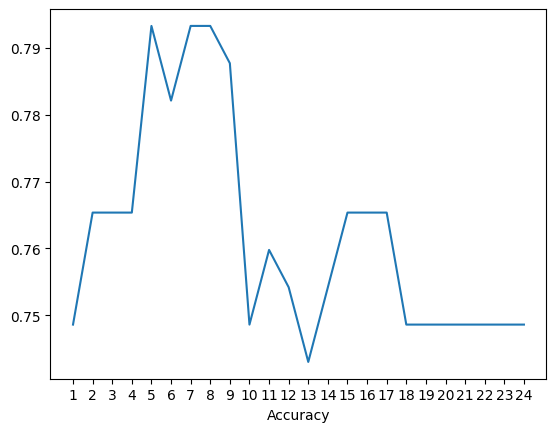

In [21]:
pruned_depths = range(1,unristricted_depth_tree.tree_.max_depth+6)
scores = [] 
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d,random_state=r)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  scores.append(score)

fig, ax = plt.subplots()
ax.plot(pruned_depths, scores)
plt.xlabel("Max_depth values")
plt.xlabel("Accuracy")
ax.xaxis.set_ticks(pruned_depths)
plt.show()